# Spectral Entropy in Time Series Analysis

Time series analysis plays a crucial role in various domains, ranging from finance and economics to signal processing and environmental sciences. Extracting meaningful features from time series data is essential for gaining insights and making accurate predictions. One often overlooked yet powerful feature for analyzing time series data is spectral entropy.

Spectral entropy measures the complexity or irregularity of a signal's frequency spectrum. It provides valuable information about the distribution of frequencies present in a time series, allowing us to characterize its underlying dynamics. 

**Why is Spectral Entropy Important?**

Spectral entropy offers several advantages and is particularly useful for feature engineering in time series analysis. Here are some key reasons why spectral entropy should not be underestimated:

1. **Detection of Hidden Patterns**: Spectral entropy can unveil hidden patterns in time series data that might not be apparent from other statistical measures. By capturing the frequency distribution, it helps identify recurring patterns, periodic components, or irregularities that may impact the behavior of the time series.

2. **Quantification of Complexity**: Spectral entropy provides a quantitative measure of the complexity or randomness within a time series. It can differentiate between highly structured and chaotic signals, enabling us to distinguish between different types of temporal dynamics.

3. **Feature Extraction**: By incorporating spectral entropy as a feature in machine learning models, we can enhance their predictive capabilities. It complements traditional time and frequency domain features, offering additional information that can improve the accuracy of predictions and classification tasks.

4. **Signal Processing Applications**: Spectral entropy finds applications in various signal processing tasks. It can assist in noise reduction, feature selection, anomaly detection, and filtering operations, among others. Its ability to capture the spectral characteristics of a signal makes it a valuable tool in many domains.

In summary, spectral entropy provides a comprehensive measure of the frequency distribution and complexity of time series data. By leveraging this often overlooked feature, we can gain deeper insights into the underlying dynamics and enhance our analysis and prediction capabilities. In the following sections, we will explore practical examples of computing spectral entropy and demonstrate its applicability in time series analysis.


In this notebook, we will be exploring the functions from this repository that compute spectral entropy. We will showcase comprehensive plots that demonstrate how spectral entropy works, providing valuable insights for your own data science projects.

This notebook was inspired in the [pentropy](https://www.mathworks.com/help/signal/ref/pentropy.html) function from Matlab

In [10]:
#Import packages
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
sys.path.append(os.path.dirname(os.getcwd()))
from signal_analysis import inst_spectral_entropy_stft, spectral_entropy_welch_sv 

### Spectral Entropy of Pure Sine Wave

In the next cell, we will explore the instantaneous spectral entropy of a pure sine wave using the `inst_spectral_entropy_stft` function from this repository.

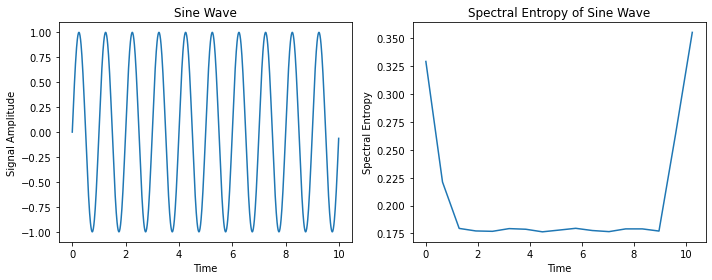

In [11]:
# Generate pure sine wave
fs1 = 100  # Sampling frequency
T = 10  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs1)  # Time array
f = 1  # Signal frequency
pure_sine_wave = np.sin(2 * np.pi * f * t)  # Pure sine wave signal

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, pure_sine_wave)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Sine Wave')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(pure_sine_wave, fs1)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Sine Wave')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

 Through the accompanying plots, we can observe that a pure sine wave exhibits a low spectral entropy, as expected due to its highly predictable and structured nature. The spectral entropy, which quantifies the complexity of the frequency spectrum, remains relatively constant over time, indicating homogeneity throughout the waveform. However, we do notice elevated spectral entropy values at the beginning and ending portions of the plot, attributed to the discontinuities introduced in the signal.

In [12]:
print(f"Single value Spectral Entropy {spectral_entropy_welch_sv(pure_sine_wave, fs1)}")

Single value Spectral Entropy 0.1847787119369457


Additionally, you can utilize the `spectral_entropy_welch_sv` function from this repository to compute a singular value for spectral entropy. This approach considers the entire signal during the computation, resulting in a single number that characterizes the spectral entropy and, consequently, the information content of the signal. This compact representation enables efficient comparisons between this signal and other signals, providing a valuable tool for signal analysis and classification tasks.

### Spectral Entropy of Sine Wave in White Noise

In the next cell, we will explore the instantaneous spectral entropy of a sine wave in white noise using the `inst_spectral_entropy_stft` function from this repository.

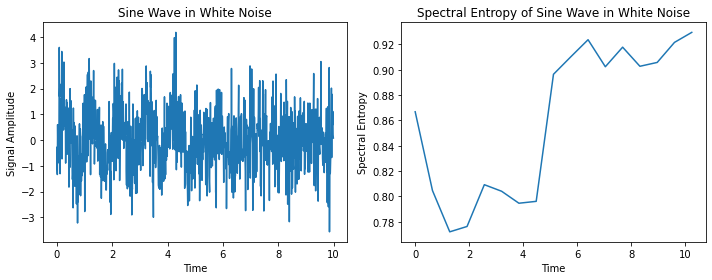

In [13]:
# Generate pure sine wave
fs2 = 100  # Sampling frequency
T = 10  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs2)  # Time array
f = 1  # Signal frequency

sine_wave = np.sin(2 * np.pi * f * t)  # Pure sine wave signal

mixed_noise = np.random.normal(0, 1, len(t))  # White noise signal
sine_wave = sine_wave + mixed_noise

mixed_noise[0:len(t)//2] = sine_wave[0:len(t)//2]

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, mixed_noise)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Sine Wave in White Noise')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(mixed_noise, fs2)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Sine Wave in White Noise')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In the previous plot, we have created a mixed signal by adding a sine wave in the first half of a white noise signal. Through the plot of instantaneous spectral entropy, we can observe a clear differentiation between the segment with the sine wave and the pure white-noise segment. This distinction arises because the sine wave contains structured information, while pure white noise exhibits the highest spectral entropy due to its random and unpredictable nature.

The plot of instantaneous spectral entropy enables us to identify and isolate specific segments within the mixed signal that possess distinct spectral properties. By analyzing the variations in spectral entropy over time, we gain insights into the presence and characteristics of underlying signals or components. This information is valuable for tasks such as signal detection, classification, and feature extraction, as it aids in uncovering hidden patterns and discerning meaningful information from noisy or mixed signals.

In [14]:
print(f"Single value Spectral Entropy {spectral_entropy_welch_sv(mixed_noise, fs2)}")

Single value Spectral Entropy 0.9108318722649219


Furthermore, you can utilize the `spectral_entropy_welch_sv` function from this repository to compute a singular value representing the spectral entropy of the entire signal. This computation takes into account the complete signal, resulting in a single number that characterizes the overall spectral entropy and, consequently, the information content of the signal. However, it is important to note that this single value does not allow us to discriminate between different time segments within the signal as we did in the previous plot.

While the single spectral entropy value provides a high measure due to the noisiness of the signal, it does not offer specific insights about the segment where the sine wave was added. The singular value alone cannot provide valuable information about the temporal characteristics or distinguish the presence of specific components within the signal. For a more detailed analysis and localization of features, it is recommended to utilize techniques such as the instantaneous spectral entropy and examine variations over time.

### Spectral Entropy of Noisy Pulse Signal

In the next cell, we will explore the instantaneous spectral entropy of a noisy pulse signal using the `inst_spectral_entropy_stft` function from this repository.

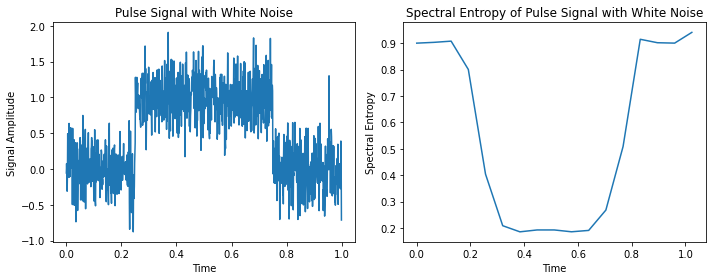

In [15]:
fs3 = 1000  # Sampling frequency
T = 1  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs3)  # Time array

# Generate a pulse signal
f_pulse = 2  # Frequency of the pulse signal
pulse = np.zeros_like(t)
pulse[int(len(t)/4):int(3*len(t)/4)] = 1

# Mix the pulse signal with white noise
noise = np.random.normal(0, 0.3, len(t))  # White noise signal
pulse_mixed_signal = pulse + noise

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, pulse_mixed_signal)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Pulse Signal with White Noise')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(pulse_mixed_signal, fs3)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Pulse Signal with White Noise')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In the previous plots, we observed the instantaneous spectral entropy for a pulse wave emitted with noise. Notably, the spectral entropy decreases during the emission of the pulse. This decline occurs because the signal spectrum transitions from resembling white noise to adopting the distribution of the pulse signal. The distribution of the pulse signal contains more structured information, resulting in a lower spectral entropy.

By utilizing the concept of the instantaneous spectral entropy, we can quantify the complexity and information content of signals, enabling us to discern between noisy components and those carrying meaningful information. Such analysis is particularly useful in applications where the identification and extraction of specific events or features within a signal are of interest, such as in biomedical signal processing, communications, or fault detection.

In [16]:
print(f"Single value Spectral Entropy {spectral_entropy_welch_sv(pulse_mixed_signal, fs3)}")

Single value Spectral Entropy 0.78766437979201


Again, while the single spectral entropy value provides a high measure due to the noisiness of the signal, it does not offer specific insights about the segment where the pulse wave was added. 

### Spectral Entropy of Mixed Signal

In the next cell, we will explore the instantaneous spectral entropy of a mixed signal using the `inst_spectral_entropy_stft` function from this repository.

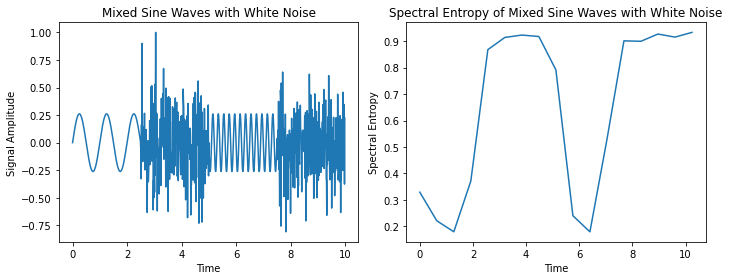

In [17]:
fs4 = 100  # Sampling frequency
T = 10  # Duration of the signal (in seconds)
t = np.arange(0, T, 1/fs4)  # Time array

# Generate sine waves with different frequencies and durations
f1 = 1  # Frequency of the first sine wave
f2 = 5  # Frequency of the second sine wave
sine_wave_1 = np.sin(2 * np.pi * f1 * t[:int(len(t)/4)])  # First sine wave signal
sine_wave_2 = np.sin(2 * np.pi * f2 * t[int(len(t)/4):int(len(t)/2)])  # Second sine wave signal

# Generate white noise signals for two regions
white_noise_1 = np.random.normal(0, 1, len(t[int(len(t)/2):int(3*len(t)/4)]))  # White noise signal 1
white_noise_2 = np.random.normal(0, 1, len(t[int(3*len(t)/4):]))  # White noise signal 2

# Combine the signals to create the final intercalated signal
x = np.concatenate((sine_wave_1, white_noise_1, sine_wave_2, white_noise_2))

# Normalize the signal to have values between -1 and 1
x = x / np.max(np.abs(x))

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first subplot
axs[0].plot(t, x)
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Signal Amplitude')
axs[0].set_title('Mixed Sine Waves with White Noise')

# Calculate the spectral entropy
t, se = inst_spectral_entropy_stft(x, fs4)

# Plot the second subplot
axs[1].plot(t, se)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Spectral Entropy')
axs[1].set_title('Spectral Entropy of Mixed Sine Waves with White Noise')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure
plt.show()

In this analysis, we have created a mixed signal comprising two sine waves with different frequencies mixed with white noise. The signal follows the pattern of sine wave 1, white noise, sine wave 2, and white noise. This configuration allows us to observe the behavior of spectral entropy throughout the different components of the mixed signal.

Upon examining the plot of spectral entropy, we observe that it starts with a low value due to the well-distributed information present in the first sine wave. As the signal progresses, the spectral entropy increases during the white noise segments, which contribute to a higher level of randomness and complexity in the frequency spectrum.

However, as the second sine wave is introduced into the signal, we notice a drop in the spectral entropy. This decline occurs because the second sine wave introduces structured information and reduces the overall randomness in the frequency spectrum. This segment contributes to a lower spectral entropy value due to the presence of a more predictable and organized signal component.

Subsequently, as the signal transitions back to the white noise segments, the spectral entropy increases again. The white noise segments reintroduce randomness and complexity, resulting in a higher spectral entropy value.

This analysis demonstrates how spectral entropy can effectively capture the variations in complexity and predictability within a mixed signal. It enables us to differentiate between segments with structured information (sine waves) and segments with random components (white noise). By quantifying the spectral entropy, we gain insights into the distribution of frequencies and the presence of information-rich components within the signal.

Understanding these spectral entropy variations can have practical applications in fields such as audio processing, communication systems, and anomaly detection. By leveraging spectral entropy, we can uncover hidden patterns, identify signal components, and enhance our analysis of time series data.

In [18]:
print(f"Single value Spectral Entropy {spectral_entropy_welch_sv(x, fs4)}")

Single value Spectral Entropy 0.8702922342910574


Again, while the single spectral entropy value provides a high measure due to the noisiness of the signal, it does not offer specific insights about the segments where the sine waves were added. 

## Summary
In this notebook, we explored the concept of spectral entropy and its significance in data science, specifically in time series analysis. Spectral entropy measures the complexity and irregularity of a signal's frequency spectrum, providing valuable insights into the underlying dynamics of time series data.

We discussed two approaches to compute spectral entropy: instantaneous spectral entropy and single value spectral entropy.

**Instantaneous Spectral Entropy**: Using the function `inst_spectral_entropy_stft`, we obtained instantaneous spectral entropy values for different segments of the signal. By analyzing variations in spectral entropy over time, we identified patterns, periodic components, and irregularities in the data. This approach enabled us to discern meaningful information and discriminate between different time segments within the signal.

**Single Value Spectral Entropy**: Utilizing functions like `spectral_entropy_welch_sv`, we computed a singular value representing the spectral entropy of the entire signal. This value characterized the overall information content and complexity of the signal but did not provide insights into specific temporal segments or components within the signal.

## Conclusion
Spectral entropy is a valuable tool for feature engineering and analysis in data science, offering unique insights into the frequency distribution and complexity of time series data. The instantaneous spectral entropy provides a comprehensive understanding of the dynamics, allowing us to identify hidden patterns, distinguish between structured and chaotic signals, and extract features for machine learning models.

On the other hand, the single value spectral entropy offers a compact representation of the overall information content of the signal, facilitating efficient comparisons between different signals. It provides a high-level measure of complexity but lacks the ability to discriminate between specific time segments or components within the signal.

By leveraging both approaches, data scientists and researchers can gain a comprehensive understanding of the spectral characteristics of time series data. The instantaneous spectral entropy helps identify temporal patterns and variations, while the single value spectral entropy allows for efficient comparisons and characterizes the overall complexity of the signal.

In conclusion, spectral entropy serves as a powerful and underestimated feature for time series analysis. Incorporating spectral entropy into your data science projects can enhance feature engineering, classification tasks, and signal processing operations, enabling deeper insights and more accurate predictions.